In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('sleep-joe-1-data.csv')  # Replace 'your_dataset.csv' with the actual file name

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(['Timestamp', 'Flag', 'Time'], axis=1))

# Function to prepare data for RNN
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for the RNN
time_steps = 5  # Adjust this according to your dataset and sequence length

# Prepare the sequential data for the RNN
X, y = prepare_data(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Adjust units for output based on your data

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=8, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")





Epoch 1/8

13842/13842 [==============================] - 229s 15ms/step - loss: 2.3690e-04
Epoch 2/8
13842/13842 [==============================] - 213s 15ms/step - loss: 1.3586e-05
Epoch 3/8
13842/13842 [==============================] - 228s 16ms/step - loss: 8.2168e-06
Epoch 4/8
13842/13842 [==============================] - 221s 16ms/step - loss: 5.7560e-06
Epoch 5/8
13842/13842 [==============================] - 181s 13ms/step - loss: 4.2059e-06
Epoch 6/8
13842/13842 [==============================] - 80s 6ms/step - loss: 3.0880e-06
Epoch 7/8
13842/13842 [==============================] - 79s 6ms/step - loss: 2.6872e-06
Epoch 8/8
3461/3461 [==============================] - 11s 3ms/step - loss: 3.5951e-07
Test Loss: 3.59510806902108e-07


In [6]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

3461/3461 [==============================] - 11s 3ms/step - loss: 3.5951e-07
Test Loss: 3.59510806902108e-07
3461/3461 [==============================] - 10s 3ms/step
R-squared: 0.24970297208026804


In [2]:
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

3461/3461 [==============================] - 9s 3ms/step
R-squared: 0.24970297208026804


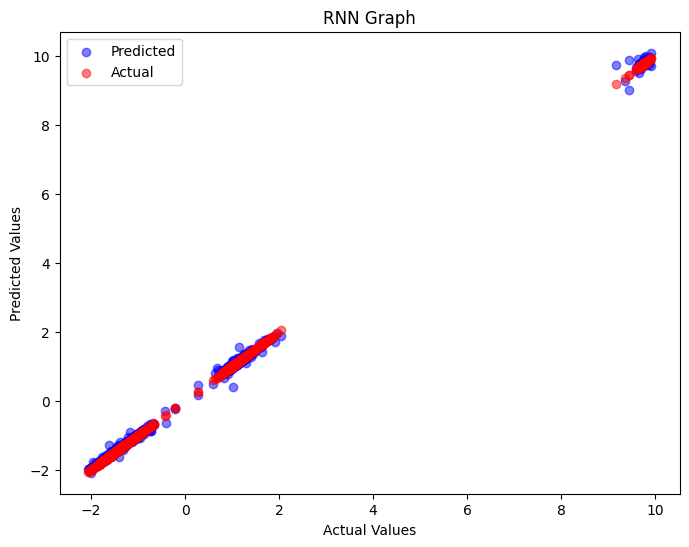

In [37]:
import matplotlib.pyplot as plt


# Rescale the predicted and actual values to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plotting the actual vs predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.5, c='blue', label='Predicted')
plt.scatter(y_test_rescaled, y_test_rescaled, alpha=0.5, c='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RNN Graph')
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.24970297208026804
